In [383]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Homework

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [252]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv


### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [253]:
df = pd.read_csv("course_lead_scoring.csv")

In [254]:
df.tail(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1452,organic_search,retail,1,49154.0,student,africa,4,0.37,1
1453,paid_ads,education,2,65742.0,employed,australia,0,0.57,0
1454,referral,finance,0,75546.0,NaN,asia,0,0.10,0
1455,referral,finance,2,NaN,NaN,south_america,3,0.47,1
1456,social_media,healthcare,1,45253.0,NaN,australia,6,0.24,1
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1
1461,organic_search,finance,3,92855.0,student,north_america,3,0.41,1


In [255]:
# Missing values
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [256]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [257]:
# For numerical features, replace NA with 0.0
df["annual_income"] = df["annual_income"].fillna(0)

In [258]:
# For categorical features, replace missing values (NA) with a string 'NA'
df["lead_source"] = df["lead_source"].fillna("NA")
df["industry"] = df["industry"].fillna("NA")
df["employment_status"] = df["employment_status"].fillna("NA")
df["location"] = df["location"].fillna("NA")

In [259]:
# Missing values
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [260]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
lead_source,paid_ads,social_media,events,paid_ads,referral,events,social_media,social_media,referral,paid_ads
industry,NA,retail,healthcare,retail,education,manufacturing,technology,NA,healthcare,other
number_of_courses_viewed,1,1,5,2,3,1,0,5,4,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0,59904.0,51283.0,62975.0,38648.0,59866.0
employment_status,unemployed,employed,unemployed,NA,self_employed,NA,NA,student,unemployed,student
location,south_america,south_america,australia,australia,europe,africa,middle_east,europe,south_america,australia
interaction_count,4,1,3,1,3,6,2,4,2,3
lead_score,0.94,0.8,0.69,0.87,0.62,0.83,0.57,0.62,0.86,0.43
converted,1,0,1,0,1,1,0,1,1,1


In [261]:
# The desired target for classification task will be `converted` variable
df["converted"].unique()

array([1, 0])

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [262]:
print(f"The most frequent observation (mode) for the column `industry` is {df['industry'].mode()}")

The most frequent observation (mode) for the column `industry` is 0    retail
Name: industry, dtype: object


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [263]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [264]:
target_column = "converted"

In [265]:
seed = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)


In [266]:
print(len(df), len(df_full_train), len(df_test))

1462 1169 293


In [267]:
df_train, df_validation = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [268]:
print(len(df), len(df_full_train), len(df_train), len(df_validation), len(df_test))

1462 1169 876 293 293


In [269]:
def split_features_and_target(df_train, df_validation, df_test):
    df_train = df_train.copy()
    df_validation = df_validation.copy()
    df_test = df_test.copy()

    y_train = df_train[target_column].values
    y_validation = df_validation[target_column].values
    y_test = df_test[target_column].values

    df_train = df_train.drop([target_column], axis=1)
    df_validation = df_validation.drop([target_column], axis=1)
    df_test = df_test.drop([target_column], axis=1)

    return df_train, y_train, df_validation, y_validation, df_test, y_test

In [270]:
df_train, y_train, df_validation, y_validation, df_test, y_test = split_features_and_target(df_train, df_validation, df_test)

### EDA

In [271]:
# Verify that the target column does not exist in the dataframe
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
1077,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
463,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
842,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
835,NA,technology,1,74956.0,employed,europe,3,0.34
837,organic_search,retail,3,59335.0,student,australia,1,0.98


In [272]:
df_full_train.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [273]:
df_full_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1066,social_media,manufacturing,2,44403.0,self_employed,australia,1,0.71,0
638,events,retail,3,38048.0,student,north_america,6,0.97,1
799,social_media,education,2,71399.0,NA,europe,1,0.51,1
380,referral,education,2,47912.0,employed,australia,1,0.04,0
303,paid_ads,healthcare,1,34806.0,employed,europe,4,0.32,1


In [274]:
df_full_train[target_column].value_counts()

converted
1    710
0    459
Name: count, dtype: int64

In [275]:
# Let's get a converted rate
df_full_train[target_column].value_counts(normalize=True)

converted
1    0.607357
0    0.392643
Name: proportion, dtype: float64

In [276]:
global_converted_rate = df_full_train[target_column].mean()
global_converted_rate

np.float64(0.6073567151411463)

### Feature Importance

#### 🔍 What is **Feature Importance**

**Feature Importance** (feature importance) shows
**how much each feature influences the model's prediction**.

* If a feature is important → the model relies heavily on it when making decisions.
* If a feature is unimportant → the model may barely use it.

🧠 For example:
If a model predicts the likelihood of purchasing a course,
then "lead_score" may be more important than "annual_income".

### Feature importance. Rate and Risk Ratio.
## ⚡ What are these concepts?

These terms are often encountered in statistics, medicine, epidemiology, and data analysis when we want to compare the probability or frequency of events between two groups.

---

## 1️⃣ **Rate (frequency, event level)**

**Rate** is how often an event occurs over a given period of time or a given number of observations.

### 📊 Example:

In a hospital with 1,000 patients:

* 20 got the flu.

👉 Then **Rate (frequency)** =
$$
rate = \frac{20}{1000} = 0.02 = 2%
$$

That is, **2% of patients got sick**.

---

## 2️⃣ **Risk**

**Risk** is the **probability** of an event occurring in a group over a given period.

> "Rate" and "risk" are often similar,
> but "risk" is more often used when considering the *probability for a group of people*.

For example:

* "The risk of getting the flu over the winter is 2%."

---

## 3️⃣ **Risk Ratio**

**Risk Ratio (RR)** or **Relative Risk** shows
**how many times the risk of an event is higher (or lower)** in one group compared to another.

$$
RR = \frac{Risk_{\text{experimental group}}}{Risk_{\text{control group}}}
$$

---

### 📘 Example:

| Group | Number of people | Sick | Risk |
| ---------- | ----------- | -------- | ---- |
| Vaccinated | 1000 | 10 | 0.01 |
| Unvaccinated | 1000 | 40 | 0.04 |

$$
RR = \frac{0.01}{0.04} = 0.25
$$

👉 **Risk Ratio = 0.25**, meaning:

* The risk of illness in the vaccinated group is **4 times lower** (or 75% lower).

---

## 🧠 Risk Ratio Interpretation

| Risk Ratio | Meaning |
| ---------- | ------------------------- |
| **1.0** | the risks are the same |
| **> 1.0** | the risk is higher in the first group |
| **< 1.0** | the risk is lower in the first group |

---

## 4️⃣ **Rate Ratio** (frequency ratio)

Similar to Risk Ratio,
but used when we are interested in the **frequency of events over time**, rather than just probability.

For example:

* 5 events per 1,000 person-days in Group A
* 10 events per 1,000 person-days in Group B

$$
Rate/Ratio = \frac{5}{10} = 0.5
$$

➡️ Events occur **half as often** in Group A.

---

## 📊 Total

| Concept | What does it mean | Formula | Example |
| ------------------- | ------------------- | --------------------- | ------------------ |
| **Rate** | event frequency | events / total number | 20/1000 = 2% |
| **Risk** | event probability | events / total number | 0.02 |
| **Risk Ratio (RR)** | risk comparison | risk₁ / risk₂ | 0.01 / 0.04 = 0.25 |
| **Rate Ratio** | frequency comparison | rate₁ / rate₂ | 5 / 10 = 0.5 |

In [277]:
# Get a converted rate for the `education` industry
education_industry_converted_rate = df_full_train[df_full_train["industry"] == "education"][target_column].mean()
education_industry_converted_rate

np.float64(0.7902097902097902)

In [278]:
# The difference of the converted rate for the `education` industry and a global converted rate is not small.
# It gives us intuition that the `global converted rate` is better if users come from the education industry.
education_industry_converted_rate - global_converted_rate

np.float64(0.1828530750686439)

In [279]:
# Let's calculate the converted rate for each value of the `industry` column
df_full_train.groupby("industry")[target_column].mean()

industry
NA               0.557522
education        0.790210
finance          0.556886
healthcare       0.593333
manufacturing    0.621429
other            0.612903
retail           0.566265
technology       0.562963
Name: converted, dtype: float64

In [280]:
df_full_train.groupby("industry")[target_column].agg(["mean", "count"])

,mean,count
industry,,
NA,0.557522,113
education,0.790210,143
finance,0.556886,167
healthcare,0.593333,150
manufacturing,0.621429,140
other,0.612903,155
retail,0.566265,166
technology,0.562963,135


In [281]:
# The difference between converted rates are:
df_full_train.groupby("industry")[target_column].mean() - global_converted_rate

industry
NA              -0.049835
education        0.182853
finance         -0.050470
healthcare      -0.014023
manufacturing    0.014072
other            0.005547
retail          -0.041092
technology      -0.044394
Name: converted, dtype: float64

The conclusion is that users from the `education` industry have the best conversion.

In [331]:
categorical_columns = ["lead_source", "industry", "employment_status", "location"]

Let's take a look at all categorical values and calculate `rate` and `ratio`

In [332]:
from IPython.display import display

for column in categorical_columns:
    display(column)

    df_group = df_full_train.groupby(column)[target_column].agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_converted_rate
    df_group["rate"] = df_group["mean"] / global_converted_rate

    display(df_group)

'lead_source'

,mean,count,diff,rate
lead_source,,,,
NA,0.669725,109,0.062368,1.102688
events,0.592965,199,-0.014392,0.976304
organic_search,0.615721,229,0.008364,1.013771
paid_ads,0.428571,210,-0.178785,0.705634
referral,0.786408,206,0.179051,1.294804
social_media,0.583333,216,-0.024023,0.960446


'industry'

,mean,count,diff,rate
industry,,,,
NA,0.557522,113,-0.049835,0.917948
education,0.790210,143,0.182853,1.301064
finance,0.556886,167,-0.050470,0.916901
healthcare,0.593333,150,-0.014023,0.976911
manufacturing,0.621429,140,0.014072,1.023169
other,0.612903,155,0.005547,1.009132
retail,0.566265,166,-0.041092,0.932343
technology,0.562963,135,-0.044394,0.926907


'employment_status'

,mean,count,diff,rate
employment_status,,,,
NA,0.571429,84,-0.035928,0.940845
employed,0.671937,253,0.064580,1.106330
self_employed,0.635739,291,0.028382,1.046731
student,0.659722,288,0.052366,1.086219
unemployed,0.462451,253,-0.144906,0.761415


'location'

,mean,count,diff,rate
location,,,,
NA,0.680000,50,0.072643,1.119606
africa,0.592857,140,-0.014500,0.976127
asia,0.588608,158,-0.018749,0.969130
australia,0.612903,155,0.005547,1.009132
europe,0.641176,170,0.033820,1.055684
middle_east,0.644172,163,0.036815,1.060615
north_america,0.589888,178,-0.017469,0.971238
south_america,0.554839,155,-0.052518,0.913530


### Feature importance. Mutual information.
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

### 💡 What is it

**Mutual information** is **the extent to which knowing one variable helps us know another**.

---

### 🔍 Intuitive Example

Imagine we have two things:

* **Weather**: sunny ☀️ or raining 🌧
* **Umbrella**: whether the person took an umbrella or not

If you **know it's raining**, then you can **almost certainly** guess that the person **took an umbrella**.
➡️ This means that **weather and umbrella are related**, and **mutual information is high**.

But if you know the person likes cats 🐱, that **tells you nothing about the umbrella**.
➡️ This means **mutual information = 0** (no relationship).

---

### 🧠 The Idea Formally

Mutual information shows how many "bits" of knowledge about one variable we gain by knowing the value of another.

* If they are independent → mutual information = 0
* If they completely determine each other → mutual information is maximal

---

### 📊 Where it's used

* In machine learning, to select the most informative features (feature selection)
* In data analysis, to understand whether there is a nonlinear relationship between variables (as opposed to correlation, which only sees linear relationships)
---

### 🧩 In Brief

| Situation | Mutual Information |
| ----------------------------------------------- | ------------------- |
| Independent variables | 0 |
| Strongly correlated | High |
| Completely determine each other | Maximum |


In [333]:
from sklearn.metrics import mutual_info_score

for column in categorical_columns:
    display(column)
    score = mutual_info_score(df_full_train[target_column], df_full_train[column])
    display(score)

'lead_source'

0.025665373935054955

'industry'

0.011684562750165564

'employment_status'

0.013258496589914293

'location'

0.0022530354195563346

In [334]:
def score_for_mutual_info(series):
    return mutual_info_score(df_full_train[target_column], series)

In [335]:
# Will display the same values as from the code above.
# We can see that the first top categories are most important for model training.
mutual_infos = df_full_train[list(categorical_columns)].apply(score_for_mutual_info)
mutual_infos.sort_values(ascending=False)

lead_source          0.025665
employment_status    0.013258
industry             0.011685
location             0.002253
dtype: float64

### Feature Importance. Correlation.
How about numerical columns?
-  Correlation coefficient

---

#### 📈 1. What is **Correlation**

**Correlation** is a way to understand **how closely two features are related**.
It is measured by the **correlation coefficient**, which shows:

| Meaning | What does it mean |
| -------- | ---------------------------- |
| **+1** | perfect positive correlation |
| **0** | no correlation |
| **–1** | perfect negative correlation |

Example:

* The higher the `interaction_count`, the higher the `lead_score` → positive correlation.
* The higher the `price`, the lower the `sales` → negative correlation.

---

#### ⚙️ 2. How does this relate to **numerical columns**

For **numerical columns**, we can directly calculate the **correlation coefficient**
(usually the **Pearson correlation coefficient**):

$$
r = \frac{cov(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

where:

* `cov(X, Y)` is the covariance between the columns,
* `σX`, `σY` are the standard deviations.

This coefficient shows how linearly related two numerical columns are.

---

#### 💡 3. How does this help in feature analysis?

* Correlation helps **understand the relationships between numerical variables**. * If two features are **highly correlated** (e.g., r > 0.9),
then they are **similar** and **one can be removed** to avoid duplicating information.
* Feature Importance helps understand **which features the model actually uses**.

---

#### 📊 Summary

| Concept | What it shows |
| --------------------------- | -------------------------------------------------------- |
| **Feature Importance** | which features influence the model the most |
| **Correlation** | how closely related are the features |
| **Numerical Columns** | you can calculate the correlation coefficient for them |
| **Correlation Coefficient** | a number from -1 to +1 indicating the strength and direction of the relationship |

In [336]:
numerical_columns = ["interaction_count", "lead_score", "number_of_courses_viewed", "annual_income"]

In [337]:
df_full_train[numerical_columns]

,interaction_count,lead_score,number_of_courses_viewed,annual_income
1066,1,0.71,2,44403.0
638,6,0.97,3,38048.0
799,1,0.51,2,71399.0
380,1,0.04,2,47912.0
303,4,0.32,1,34806.0
...,...,...,...,...
1130,2,0.30,1,57039.0
1294,2,0.44,2,56185.0
860,1,0.02,1,56402.0
1459,3,0.02,1,45688.0


In [338]:
# The correlation values for numerical columns
df_full_train[numerical_columns].corrwith(df_full_train[target_column])

interaction_count           0.378482
lead_score                  0.225641
number_of_courses_viewed    0.442068
annual_income               0.029612
dtype: float64

Let's verify how number of viewed courses correlate with the `converted` value

In [339]:
# There were 2 viewed courses
df_full_train[df_full_train["number_of_courses_viewed"] < 4]["converted"].value_counts()

converted
1    552
0    452
Name: count, dtype: int64

In [340]:
# There were 4 viewed courses
df_full_train[df_full_train["number_of_courses_viewed"] >= 4]["converted"].value_counts()

converted
1    158
0      7
Name: count, dtype: int64

The more courses were viewed, the more converted rate is.

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

In [341]:
df_train.corr(numeric_only=True)

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.001875,-0.050187,0.011529
annual_income,0.001875,1.000000,-0.015510,0.048096
interaction_count,-0.050187,-0.015510,1.000000,0.011374
lead_score,0.011529,0.048096,0.011374,1.000000


- `interaction_count` and `lead_score`:                0.011374
- `number_of_courses_viewed` and `lead_score`:         0.011529
- `number_of_courses_viewed` and `interaction_count`: -0.050187  <-- The biggest correlation
- `annual_income` and `interaction_count`:            -0.015510

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source`
- `employment_status`

In [342]:
def mutual_info_for_categorical_scores(series):
    return mutual_info_score(y_train, series)

mutual_infos = df_train[list(categorical_columns)].apply(mutual_info_for_categorical_scores)
round(mutual_infos.sort_values(ascending=False), 2)

lead_source          0.04
employment_status    0.01
industry             0.01
location             0.00
dtype: float64

### One-hot encoding

#### 💡 What is **One-Hot Encoding**

**One-Hot Encoding** is a way to transform **categorical features** (i.e. text, non-numeric) into a **numeric format** that machine learning algorithms understand.

---

#### 📦 Example

Let's say we have a feature 'Color' with the values:

| Color |
| :---: |
| Red |
| Green |
| Blue |

A machine can't work directly with words, so we do this:

| Color_Red | Color_Green | Color_Blue |
| :-------: | :---------: | :--------: |
|     1     |      0      |      0     |
|     0     |      1      |      0     |
|     0     |      0      |      1     |


👉 Each value is converted into a **set of zeros and one 1** —
the "1" indicates which category is selected.

---

#### 🧠 Why this is important

* The model **doesn't process text**, only numbers.
* If you simply replace words with numbers (e.g., Red=1, Green=2, Blue=3),
the model **will think that "Blue > Green > Red"**, even though this is **not true**.
* One-Hot solves this problem — all categories are **equal**.


---

#### 📊 Summary

| Concept | Meaning |
| ---------------- | -------------------------------------------- |
| **What it does** | Converts categories into 0/1 features |
| **Why is it needed** | So that the model understands categorical data |
| **Advantage** | Doesn't create false ordering between categories |

In [343]:
from sklearn.feature_extraction import DictVectorizer

In [344]:
df_train[["employment_status", "industry"]].iloc[:10]

,employment_status,industry
1077,student,retail
463,student,manufacturing
842,employed,technology
835,employed,technology
837,student,retail
307,student,retail
269,unemployed,finance
228,student,retail
1234,employed,NA
321,student,education


In [345]:
dict_vectorizer_dict = df_train[["employment_status", "industry"]].iloc[:10].to_dict(orient="records")
dict_vectorizer_dict

[{'employment_status': 'student', 'industry': 'retail'},
 {'employment_status': 'student', 'industry': 'manufacturing'},
 {'employment_status': 'employed', 'industry': 'technology'},
 {'employment_status': 'employed', 'industry': 'technology'},
 {'employment_status': 'student', 'industry': 'retail'},
 {'employment_status': 'student', 'industry': 'retail'},
 {'employment_status': 'unemployed', 'industry': 'finance'},
 {'employment_status': 'student', 'industry': 'retail'},
 {'employment_status': 'employed', 'industry': 'NA'},
 {'employment_status': 'student', 'industry': 'education'}]

In [346]:
dv = DictVectorizer(sparse=False)
# Learn a list of feature name -> indices mappings
dv.fit(dict_vectorizer_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [347]:
dv.get_feature_names_out()

array(['employment_status=employed', 'employment_status=student',
       'employment_status=unemployed', 'industry=NA',
       'industry=education', 'industry=finance', 'industry=manufacturing',
       'industry=retail', 'industry=technology'], dtype=object)

In [348]:
dv.transform(dict_vectorizer_dict)

array([[0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.]])

### Logistic regression
- Binary classification
- Linear vs logistic regression

## ⚙️ What is Logistic Regression

**Logistic regression** is a machine learning method used when **you need to predict one of two possible states** (e.g. *Yes / No*, *1 / 0*, *Buy / Not Buy*).

---

## 🎯 1. Binary Classification

**Binary classification** is a problem where there are **only two possible outcomes**.

Examples:

* Spam or not spam 📧
* Sick or healthy 🩺
* Will the customer buy the product or not 🛒

Here, the model tries to **predict the probability** that an object belongs to class "1".

---

### 🔢 Example:

| Feature | Outcome |
| ------- | -------------- |
| Age | Will buy (1/0) |
| 20 | 0 |
| 25 | 1 |
| 30 | 1 |
| 35 | 0 |

Logistic regression learns to find the **dependency between features and the probability** that `Outcome = 1`.

--

## 📈 2. Linear vs. Logistic Regression

Both models are similar in form (both calculate a linear combination of features),
but **are used for different purposes** 👇

| Feature | **Linear Regression** | **Logistic Regression** |
| ---------------- | ---------------------------------------------- | ----------------------------------------------------- |
| Goal | Predict a number (e.g., price) | Predict category (0 or 1) |
| Output | Any real number | Probability from 0 to 1 |
| Function | Linear: ( y = w_0 + w_1*x_1 + ... + w_n*x_n ) | Logistic (sigmoid): $$( p = \frac{1}{1 + e^{-z}} )$$ |
| Where is it used | Regression | Classification |

---

### 🧠 Why is the **sigmoid** needed?

If we used regular **linear regression**,
the model might predict values ​​like `–2` or `1.5`,
and **this is not suitable for probabilities**, which must be between `0` and `1`.

The sigmoid function solves this:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This function "compresses" any number into the range **(0, 1)**.
That is, the model returns not just "1" or "0", but the **probability** of class membership.

---

## 💡 Interpreting the Result

If the model returns:

* `p = 0.9` → the object is 90% likely to belong to class "1"
* `p = 0.2` → the object most likely belongs to class "0"

A **threshold of 0.5** is often used:

* if `p ≥ 0.5` → predict class 1
* otherwise → class 0

---

## 🧩 Summary

| Concept | What does it mean? |
| ------------------------- | ------------------------------------------- |
| **Binary classification** | when you need to predict one of two outcomes |
| **Linear regression** | predicts a number |
| **Logistic regression** | predicts a probability (0–1) |
| **Sigmoid** | converts a linear combination into a probability |
| **Threshold** | decides which class to choose based on probability |

In [379]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [380]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [381]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

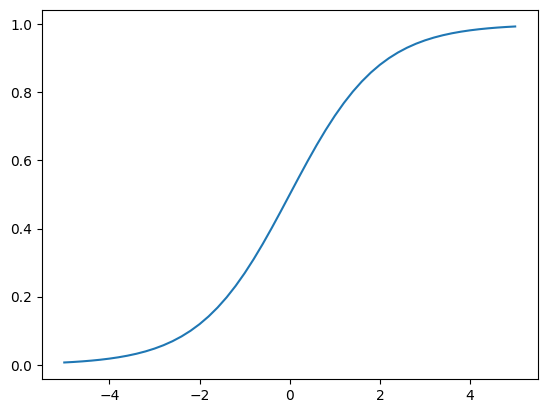

In [ ]:
plt.plot(z, sigmoid(z))

```python
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result
```

```python
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result
```

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [357]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
1077,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
463,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
842,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
835,NA,technology,1,74956.0,employed,europe,3,0.34
837,organic_search,retail,3,59335.0,student,australia,1,0.98


In [358]:
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient="records")
train_dict[0]

{'lead_source': 'paid_ads',
 'industry': 'retail',
 'employment_status': 'student',
 'location': 'middle_east',
 'interaction_count': 5,
 'lead_score': 0.03,
 'number_of_courses_viewed': 0,
 'annual_income': 58472.0}

In [359]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [360]:
# please note that there are not numerical columns here.
# DictVectorizer is smart enough to not to use numerical categories.
# It maps numerical columns as is (see the output below).
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [363]:
X_train = dv.transform(train_dict)
X_train[0]

array([5.8472e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00,
       3.0000e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00])

In [369]:
validation_dict = df_validation[categorical_columns + numerical_columns].to_dict(orient="records")
# We have already called the method `fit` for the train dataset
X_validation = dv.transform(train_dict)

In [370]:
from sklearn.model_selection import Lo
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

ImportError: cannot import name 'Lo' from 'sklearn.model_selection' (/workspaces/ml-zoomcamp/.venv/lib/python3.12/site-packages/sklearn/model_selection/__init__.py)